In [94]:
import scipy.stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error as mse
from sklearn import metrics

# Explore this dataset using what you have learned in data preprocessing and data visualization 

COMPREHENSION DE LA DATAFRAME
<p><strong> ID:</strong>l'identifiant de la maison</p>
<p><strong>date :</strong>Date à laquelle la maison a été vendue</p>    
<p><strong>price :</strong>le Prix de la maison vendue</p>
<p><strong>bedroom :</strong>le Nombre de chambres</p>
<p><strong>bathroom :</strong>le Nombre de salles de bains</p>
<p><strong>sqft_living :</strong> la Superficie en pieds carrés du salon</p>
<p><strong>sqft_lot :</strong> la Superficie en pieds carrés de la bûche</p>
<p><strong>floors :</strong> Nombre total d’étages dans la maison</p>
<p><strong>waterfront :</strong> Si la maison a une vue sur le front de mer</p>
<p><strong>view:</strong>Le nombre de fois que la maison a été visité ou habité</p> 
<p><strong>condition :</strong> l'État de la maison</p>
<p><strong>grade :</strong> l'identifiant de la maison</p>    
<p><strong>sqft_above :</strong> la Superficie en pieds carrés de la maison en dehors du sous-sol</p>    
<p><strong>sqft_basement :</strong> la Superficie en pieds carrés du sous-sol</p>    
<p><strong>yr_built :</strong> l'Année de construction</p>
<p><strong>yr_renovated :</strong> l'Année de rénovation de la maison</p>    
<p><strong>zipcode :</strong> le code postal de la maison</p> 
<p><strong>lat :</strong> latitude</p>
<p><strong>long :</strong> longitude</p>       
<p><strong>sqft_living15 :</strong>Salon en 2015 </p>    
<p><strong>sqft_lot15 :</strong>terrain en 2015</p>  


In [95]:
data = pd.read_csv('Kc_house_data.csv')

In [96]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [97]:
data.drop('id',inplace=True,axis=1)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

J'ai vu qu'il etait difficile de pourvoir lire la date comme elle etait presente alors j'ai fait des recherches et j'ai ensuite dedicé de scinder les elements en moiset année.

In [99]:
data['date'] = pd.to_datetime(data['date'])
data['Month'] = data['date'].apply(lambda date: date.month)
data['Year'] = data['date'].apply(lambda date: date.year)

In [100]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


J'ai utilisé la fonction Np round de Numpy pour arrondir directement les nombres avec des virgules

In [101]:
data['bathrooms'] = np.round(data['bathrooms'])
data['floors'] = np.round(data['floors'])

In [102]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Month            0
Year             0
dtype: int64

La fonction date ne m'interesse pas dans l'algorithme de prediction de données de maison. alors je l'ai supprimé

In [103]:
data.drop('date',inplace=True,axis=1)

In [104]:
def resizeplot(l,a):
    plt.figure(figsize=(l,a))

Histogramme montrant la relation entre le prix et le nombre total de maison c'est a dire qui explique le nombre total de maison en fonction des prix.

<AxesSubplot:xlabel='price', ylabel='Count'>

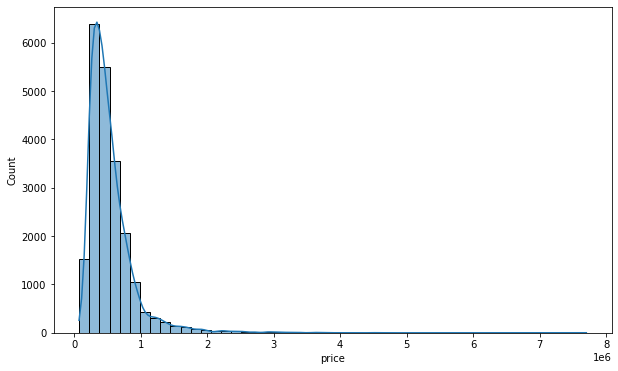

In [105]:
resizeplot(10,6)
sns.histplot(data['price'],kde=True,bins=50)

Nous allons ensuite faire une Heatmap pour voir les relations entre deux variable.

<AxesSubplot:>

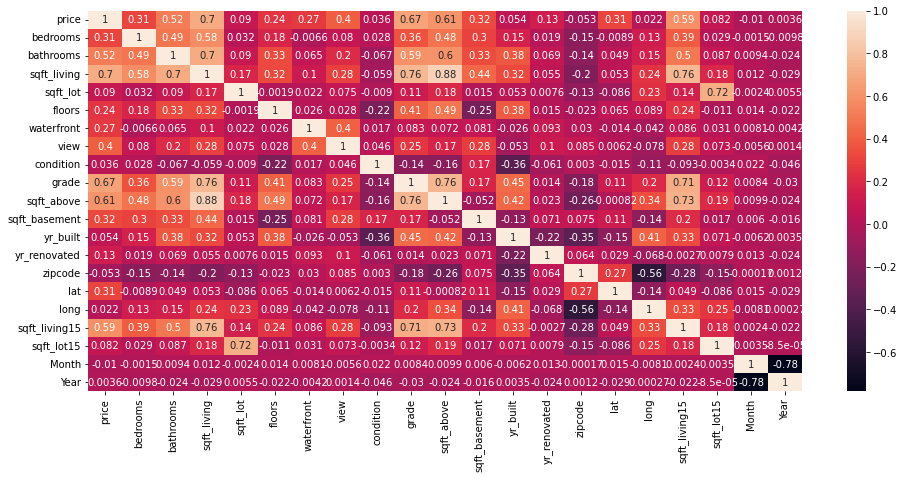

In [106]:
resizeplot(16,7)
sns.heatmap(data.corr(),annot=True)

Graphique montrant le nombre de maison qui ont été visités ou habités

<AxesSubplot:xlabel='view', ylabel='count'>

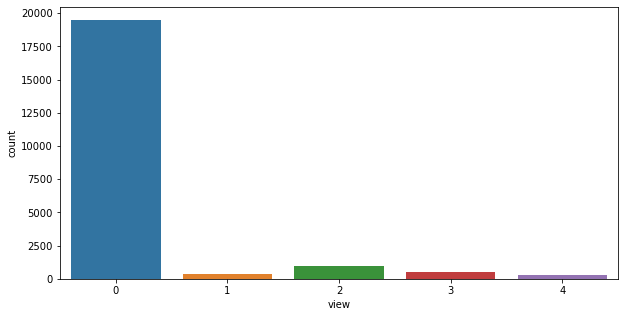

In [16]:
resizeplot(10,5)
sns.countplot(x='view',data=data)

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <BarContainer object of 10 artists>)

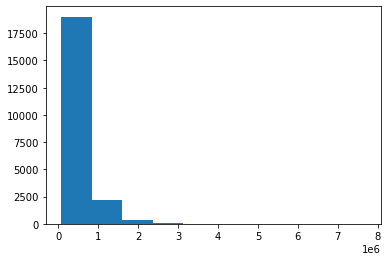

In [21]:
plt.hist(data['price'])

<AxesSubplot:xlabel='waterfront', ylabel='count'>

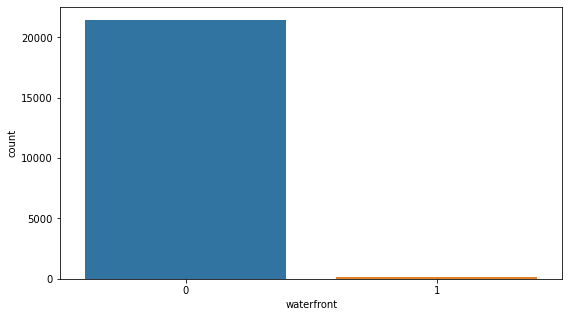

In [22]:
resizeplot(9,5)
sns.countplot(x='waterfront',data=data)

<AxesSubplot:xlabel='view', ylabel='count'>

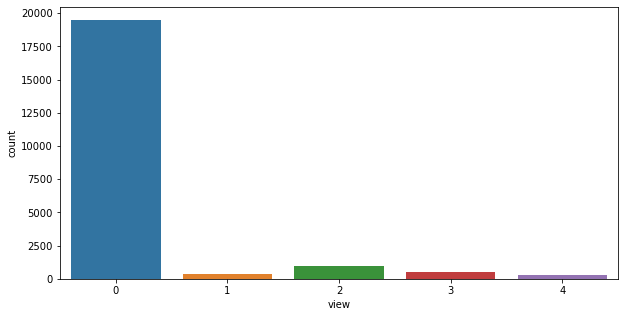

In [23]:
resizeplot(10,5)
sns.countplot(x='view',data=data)

<AxesSubplot:xlabel='grade', ylabel='price'>

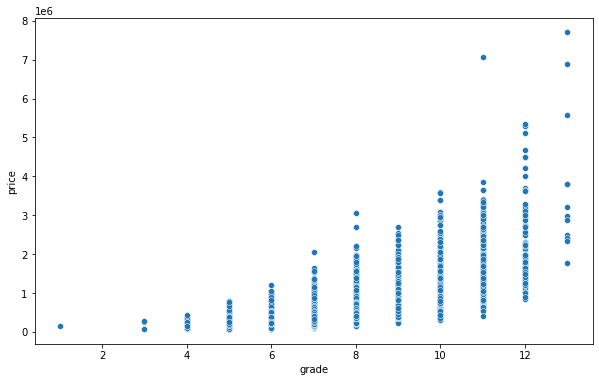

In [24]:
resizeplot(10,6)
sns.scatterplot(x='grade',y='price',data=data,palette='terrain')

<AxesSubplot:xlabel='grade', ylabel='price'>

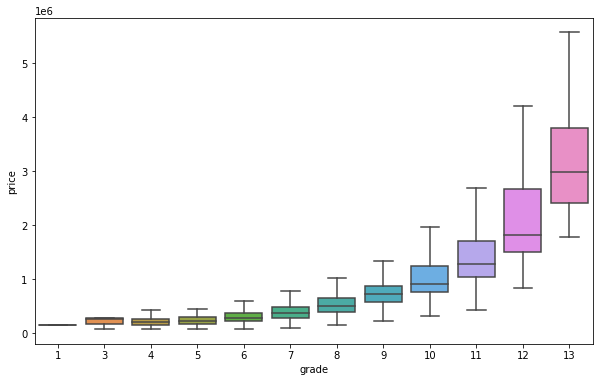

In [25]:
resizeplot(10,6)
sns.boxplot(x='grade',y='price',data=data,showfliers=False)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

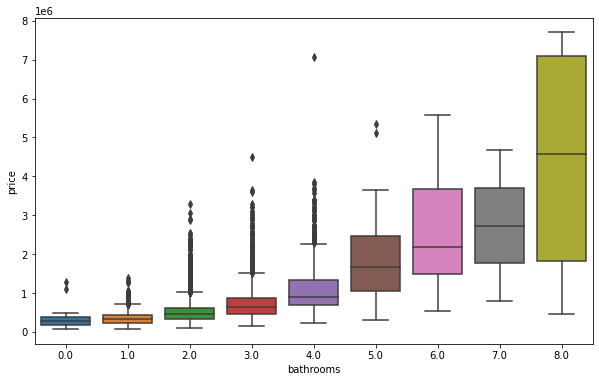

In [26]:
resizeplot(10,6)
sns.boxplot(x='bathrooms',y='price',data=data)

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

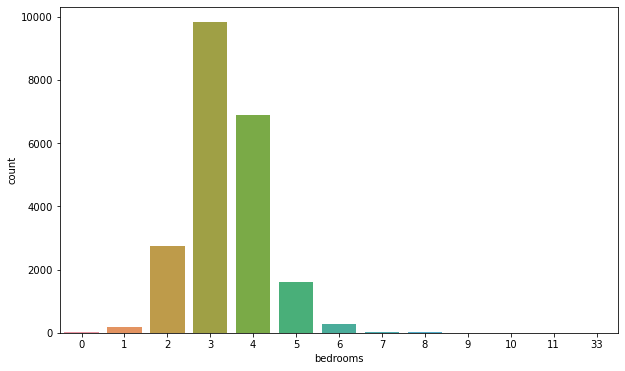

In [27]:
resizeplot(10,6)
sns.countplot(x='bedrooms',data=data )

# Write a paragraph selecting the most important features (feature selection)

Les features que je choisi pour ce modele sont :
    bedrooms,
    bathrooms,
    sqft_living,
    sqft_lot,
    floors,
    waterfront,
    view,condition,
    grade,sqft_above,
    sqft_basement,
    sqft_living15,
    sqft_lot15,
    price

In [107]:
X = data['bedrooms']
Y= data['price'].values

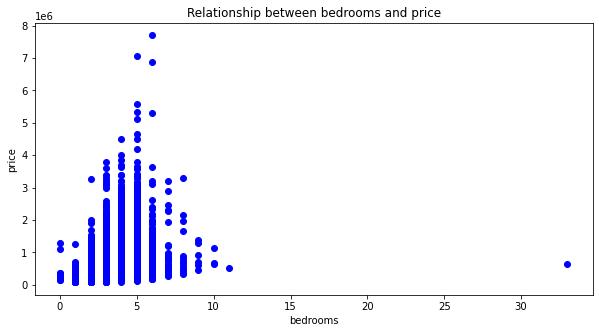

In [108]:
plt.figure(figsize=(10,5))
plt.scatter(X,y,color='blue',label='Scatter Plot')
plt.title('Relationship between bedrooms and price')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()

# linear Regression 


In [109]:
x_lineaire=data['bedrooms'].values[:,np.newaxis]
y=data['price']

# Split your dataset into a training set and a testing set.  

In [110]:
x_trainlin,x_testlin,y_trainlin,y_testlin=train_test_split(x_lineaire,y,test_size=0.30,random_state=40)

# Linear Regression application

In [111]:
model = LinearRegression()
model.fit(x_trainlin,y_trainlin)

LinearRegression()

In [112]:
predictionLinear= model.predict(x_testlin)

In [113]:
metrics.r2_score(y_testlin,predictionLinear)

0.0976005235577071

ValueError: X has 1 features, but LinearRegression is expecting 28 features as input.

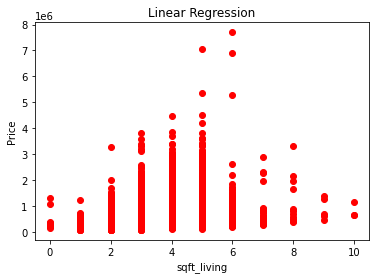

In [147]:
plt.scatter(x_trainlin,y_trainlin,color="r")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("sqft_living")
plt.plot(x_trainlin,model.predict(x_trainlin),color="k")
plt.show()

# Multi Linear Linear Regression application


In [120]:
x_lineaireMul=data[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront']]


In [121]:
x_trainlinMul,x_testlinMul,y_trainlinMul,y_testlinMul=train_test_split(x_lineaireMul,y,test_size=0.30,random_state=40)


In [122]:
model.fit(x_trainlinMul,y_trainlinMul)

LinearRegression()

In [123]:
predictionLinearMul= model.predict(x_testlinMul)

In [124]:
metrics.r2_score(y_testlinMul,predictionLinearMul)

0.5447496433691907

Je remarque que le score de la regression multi-lineaire est inferieur a la methode lineaire simple

# Apply polynomial regression and compare it to linear and multilinear regression. 

In [125]:
poly = PolynomialFeatures() 

In [126]:
x_poly=poly.fit_transform(x_lineaireMul)

In [127]:
x_trainpoly,x_testpoly,y_trainpoly,y_testpoly=train_test_split(x_poly,y,test_size=0.30,random_state=40)


In [128]:
model.fit(x_poly,y)

LinearRegression()

In [129]:
predictionpoly= model.predict(x_testpoly)

In [130]:
metrics.r2_score(y_testpoly,predictionpoly)

0.5943600344860567

Je remarque que le score de la regression polynomiale est inferieur a la methode multi-lineaire